# Semestrální práce 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from MWSATInstance import MWSATInstance
from MWSATSolution import MWSATSolution
from simulated_annealing import simulated_annealing
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import numpy as np

# 1) Ukázka implementace
Implementace programové reprezentace MWSAt instancí je v souboru MWSATInstance.py. Jsou uchovávány jednodlivé klauzule a proměnné jsou reprezenovány stejně jako ve vstupním souboru. Pro efektivní práci dále třída MWSATInstance uchovává pro každou proměnnou klauzule v kterých je obsažena.

Pojďme se jen rychle podívat na reprezentaci následujícího souboru:

> c This Formular is generated by mcnf \
> c \
> c    horn? no  \
> c    forced? no  \
> c    mixed sat? no  \
> c    clause length = 3  \
> c \
> c SAT instance uf20-91/uf20-01.cnf \
> p mwcnf 20 91 \
> w 272 39 39 194 1 194 1 78 117 156 39 1 233 311 311 1 311 39 39 311 0 \
> c range 100 1500 straight \
>  4 -18 19 0 \
> 3 18 -5 0 \
> -5 -8 -15 0 \
> -20 7 -16 0 \
> 10 -13 -7 0 \
> -12 -9 17 0 \
> 17 19 5 0 \
> -16 9 15 0 \
> 11 -5 -14 0 \
> 18 -10 13 0 \
> -3 11 12 0 \
> -6 -17 -8 0 \
> -18 14 1 0 \
> -19 -15 10 0 \
> 12 18 -19 0 \
> -8 4 7 0 \
> -8 -9 4 0 \
> 7 17 -15 0 \
> 12 -7 -14 0 \
> -10 -11 8 0 \
> 2 -15 -11 0 \
> 9 6 1 0 \
> -11 20 -17 0 \
> 9 -15 13 0 \
> 12 -7 -17 0 \
> -18 -2 20 0 \
> 20 12 4 0 \
> 19 11 14 0 \
> -16 18 -4 0 \
> -1 -17 -19 0 \
> -13 15 10 0 \
> -12 -14 -13 0 \
> 12 -14 -7 0 \
> -7 16 10 0 \
> 6 10 7 0 \
> 20 14 -16 0 \
> -19 17 11 0 \
> -7 1 -20 0 \
> -5 12 15 0 \
> -4 -9 -13 0 \
> 12 -11 -7 0 \
> -5 19 -8 0 \
> 1 16 17 0 \
> 20 -14 -15 0 \
> 13 -4 10 0 \
> 14 7 10 0 \
> -5 9 20 0 \
> 10 1 -19 0 \
> -16 -15 -1 0 \
> 16 3 -11 0 \
> -15 -10 4 0 \
> 4 -15 -3 0 \
> -10 -16 11 0 \
> -8 12 -5 0 \
> 14 -6 12 0 \
> 1 6 11 0 \
> -13 -5 -1 0 \
> -7 -2 12 0 \
> 1 -20 19 0 \
> -2 -13 -8 0 \
> 15 18 4 0 \
> -11 14 9 0 \
> -6 -15 -2 0 \
> 5 -12 -15 0 \
> -6 17 5 0 \
> -13 5 -19 0 \
> 20 -1 14 0 \
> 9 -17 15 0 \
> -5 19 -18 0 \
> -12 8 -10 0 \
> -18 14 -4 0 \
> 15 -9 13 0 \
> 9 -5 -1 0 \
> 10 -19 -14 0 \
> 20 9 4 0 \
> -9 -2 19 0 \
> -5 13 -17 0 \
> 2 -10 -18 0 \
> -18 3 11 0 \
> 7 -9 17 0 \
> -15 -6 -3 0 \
> -2 3 -13 0 \
> 12 3 -2 0 \
> -2 -3 17 0 \
> 20 -15 -16 0 \
> -5 -17 -19 0 \
> -20 -18 11 0 \
> -9 1 -5 0 \
> -19 9 17 0 \
> 12 -2 17 0 \
> 4 -16 -5 0 \
 \
 \
 \
 \
 \

In [3]:
# instance_demo = MWSATInstance(os.path.join("data","wuf20-91","wuf20-91-M","wuf20-01.mwcnf"))
instance_demo = MWSATInstance(os.path.join("test.mwcnf"))
print("Number of variables: ", instance_demo.num_vars)
print("First clause: ", instance_demo.clauses[0])
print("Clauses for variable 1: ", instance_demo.get_clauses_for_variable(1))

print("Weight for variable 1: ", instance_demo.get_weight_for_variable(1))
print("Weight for variable 2: ", instance_demo.get_weight_for_variable(2))
print("Weight for variable 3: ", instance_demo.get_weight_for_variable(3))

print("Max-weight: ", instance_demo.get_max_possible_weight())
print("Eval for [1,1,1]: ", instance_demo.evaluate([1,1,1]))
print("Eval for [1,0,1]: ", instance_demo.evaluate([1,0,1]))

print("Satisfied literals in clause 1, variables [1,1,1]: ", instance_demo.get_satisfied_vars_in_clause_count(instance_demo.clauses[0],[1,1,1]))

Number of variables:  3
First clause:  (1, -2, 3)
Clauses for variable 1:  [(1, -2, 3)]
Weight for variable 1:  272
Weight for variable 2:  39
Weight for variable 3:  39
Max-weight:  350
Eval for [1,1,1]:  (350, True)
Eval for [1,0,1]:  (311, True)
Satisfied literals in clause 1, variables [1,1,1]:  2


In [4]:
solution = MWSATSolution(instance_demo)

print("Clauses: ", solution.instance.clauses)
print("Solution var values: ", solution.variable_values)
print("Solution score: ", solution.current_score)
print("Solution clauses satisfied", solution.clauses_satisfied)
print("-------Solution flip 1----- ")
solution.update_variable_and_score(1)
print("Solution var values after: ", solution.variable_values)
print("Solution score after: ", solution.current_score)
print("Solution clauses satisfied after: ", solution.clauses_satisfied)

Clauses:  [(1, -2, 3)]
Solution var values:  [1, 0, 1]
Solution score:  311
Solution clauses satisfied 1
-------Solution flip 1----- 
Solution var values after:  [0, 0, 1]
Solution score after:  39
Solution clauses satisfied after:  1


In [5]:
instance1 = MWSATInstance(os.path.join("data","wuf50-218","wuf50-218-M","wuf50-02.mwcnf"),penalty_violation_factor=3)
# result_solution, history_clauses_sat, history_raw_score = simulated_annealing(instance1,1000,0.05,100,0.01)
result_solution, history = simulated_annealing(instance1,1000,0.95,100,max_steps_without_improvement=10000,fitness_coefficient=1)
print(result_solution.variable_values)
print(result_solution.clauses_satisfied)
print(result_solution.current_score)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
217
20834


# 2) Whitebox fáze
- Cílem této fáze bude nastavit parametry na omezené sadě instancí
- My budeme používat sadu wuf50-218 a z ní první 4 instance 

In [6]:
def get_solution_dict(filepath):
    result_dict = {}
    with open(filepath) as file:
        lines = [line.rstrip() for line in file]

        for line in lines:
            tokens = line.split(" ")
            result_dict["w"+tokens[0]] = int(tokens[1])
    return result_dict

In [7]:
wuf_50_m_path = os.path.join("data","wuf50-218", "wuf50-218-M")
wuf_50_n_path = os.path.join("data","wuf50-218", "wuf50-218-N")
wuf_50_q_path = os.path.join("data","wuf50-218", "wuf50-218-Q")
wuf_50_r_path = os.path.join("data","wuf50-218", "wuf50-218-R")
wuf_50_path = os.path.join("data","wuf50-218")

wuf_20_r_path = os.path.join("data","wuf20-91", "wuf20-91-R")
wuf_20_n_path = os.path.join("data","wuf20-91", "wuf20-91-N")
wuf_20_q_path = os.path.join("data","wuf20-91", "wuf20-91-Q")
wuf_20_m_path = os.path.join("data","wuf20-91", "wuf20-91-M")
wuf_20_path = os.path.join("data","wuf20-91")

wuf_75_r_path = os.path.join("data","wuf75-325", "wuf75-325-R")
wuf_75_m_path = os.path.join("data","wuf75-325", "wuf75-325-M")
wuf_75_q_path = os.path.join("data","wuf75-325", "wuf75-325-Q")
wuf_75_n_path = os.path.join("data","wuf75-325", "wuf75-325-N")
wuf_75_path = os.path.join("data","wuf75-325")

instance_paths = [os.path.join(wuf_50_m_path,x) for x in os.listdir(wuf_50_m_path)[:4]]
solutions_wuf_50_m = get_solution_dict(os.path.join(wuf_50_path,"wuf50-218-M-opt.dat"))

In [8]:
def plot_algorithm_run(title, history, ax=None):
    """
    Plots history on a specific Matplotlib axes (ax).
    If no ax is provided, it creates a new figure.
    """
    # If no axes is provided, create a new one (standalone plot)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotting on the specific 'ax' object
    ax.plot(history, label='Current Score', color='blue', linewidth=1, alpha=0.8)
    
    # Setting labels using the 'set_' methods
    ax.set_title(title)
    ax.set_xlabel('Step')
    ax.set_ylabel('Score')
    
    # Grid and Legend
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    
    return ax

Prvním krokem v White box fáze bude nastavení počáteční teploty. Využijeme vzorec z přdnášky 
$$
T_0 = \frac{\delta}{\ln P_0}
$$

kde $\delta$ je hlouba lokálního optima a $P$ je pravděpodobnost útěku z tohoto optima na počátku. Parametr delta lze spočítat jako průměrnou hloubku lokálních optim a parametr P budeme volit jako hyperparametr.

Pro získání $\delta$ mám upravenou verzi algoritmu simulated_annealing, která ukládá hodnoty při zhoršení. Necháme algoritmus běžet s nekonečnou teplotou, tak aby byla explorace prostoru maximální a zjistili jsme průměrnou hloubku lokálních optim. 

Pro klaždý druh generování vah budou optima mít různé hodnoty takže je budeme muset měřit zvlášť. 

# 2.1) Baseline konfigurace
- Je potřeba vytvořit si nějakou kombinaci parametrů, který funguje "dobře" na zkoumaných instancích
- Od této konfigurace se potom odpíchneme a budeme ladit jednotlivé parametry samostatně

--- Starting Final Verification (16 total runs) ---
Params: {'P0': 0.85, 'cooling_coefficient': 0.95, 'equilibrium_steps': 6, 'max_steps_without_improvement': 10000, 'fitness_coefficient': 1.2}
Processing Row 1/4: wuf50-01.mwcnf
Processing Row 2/4: wuf50-010.mwcnf
Processing Row 3/4: wuf50-0100.mwcnf
Processing Row 4/4: wuf50-01000.mwcnf


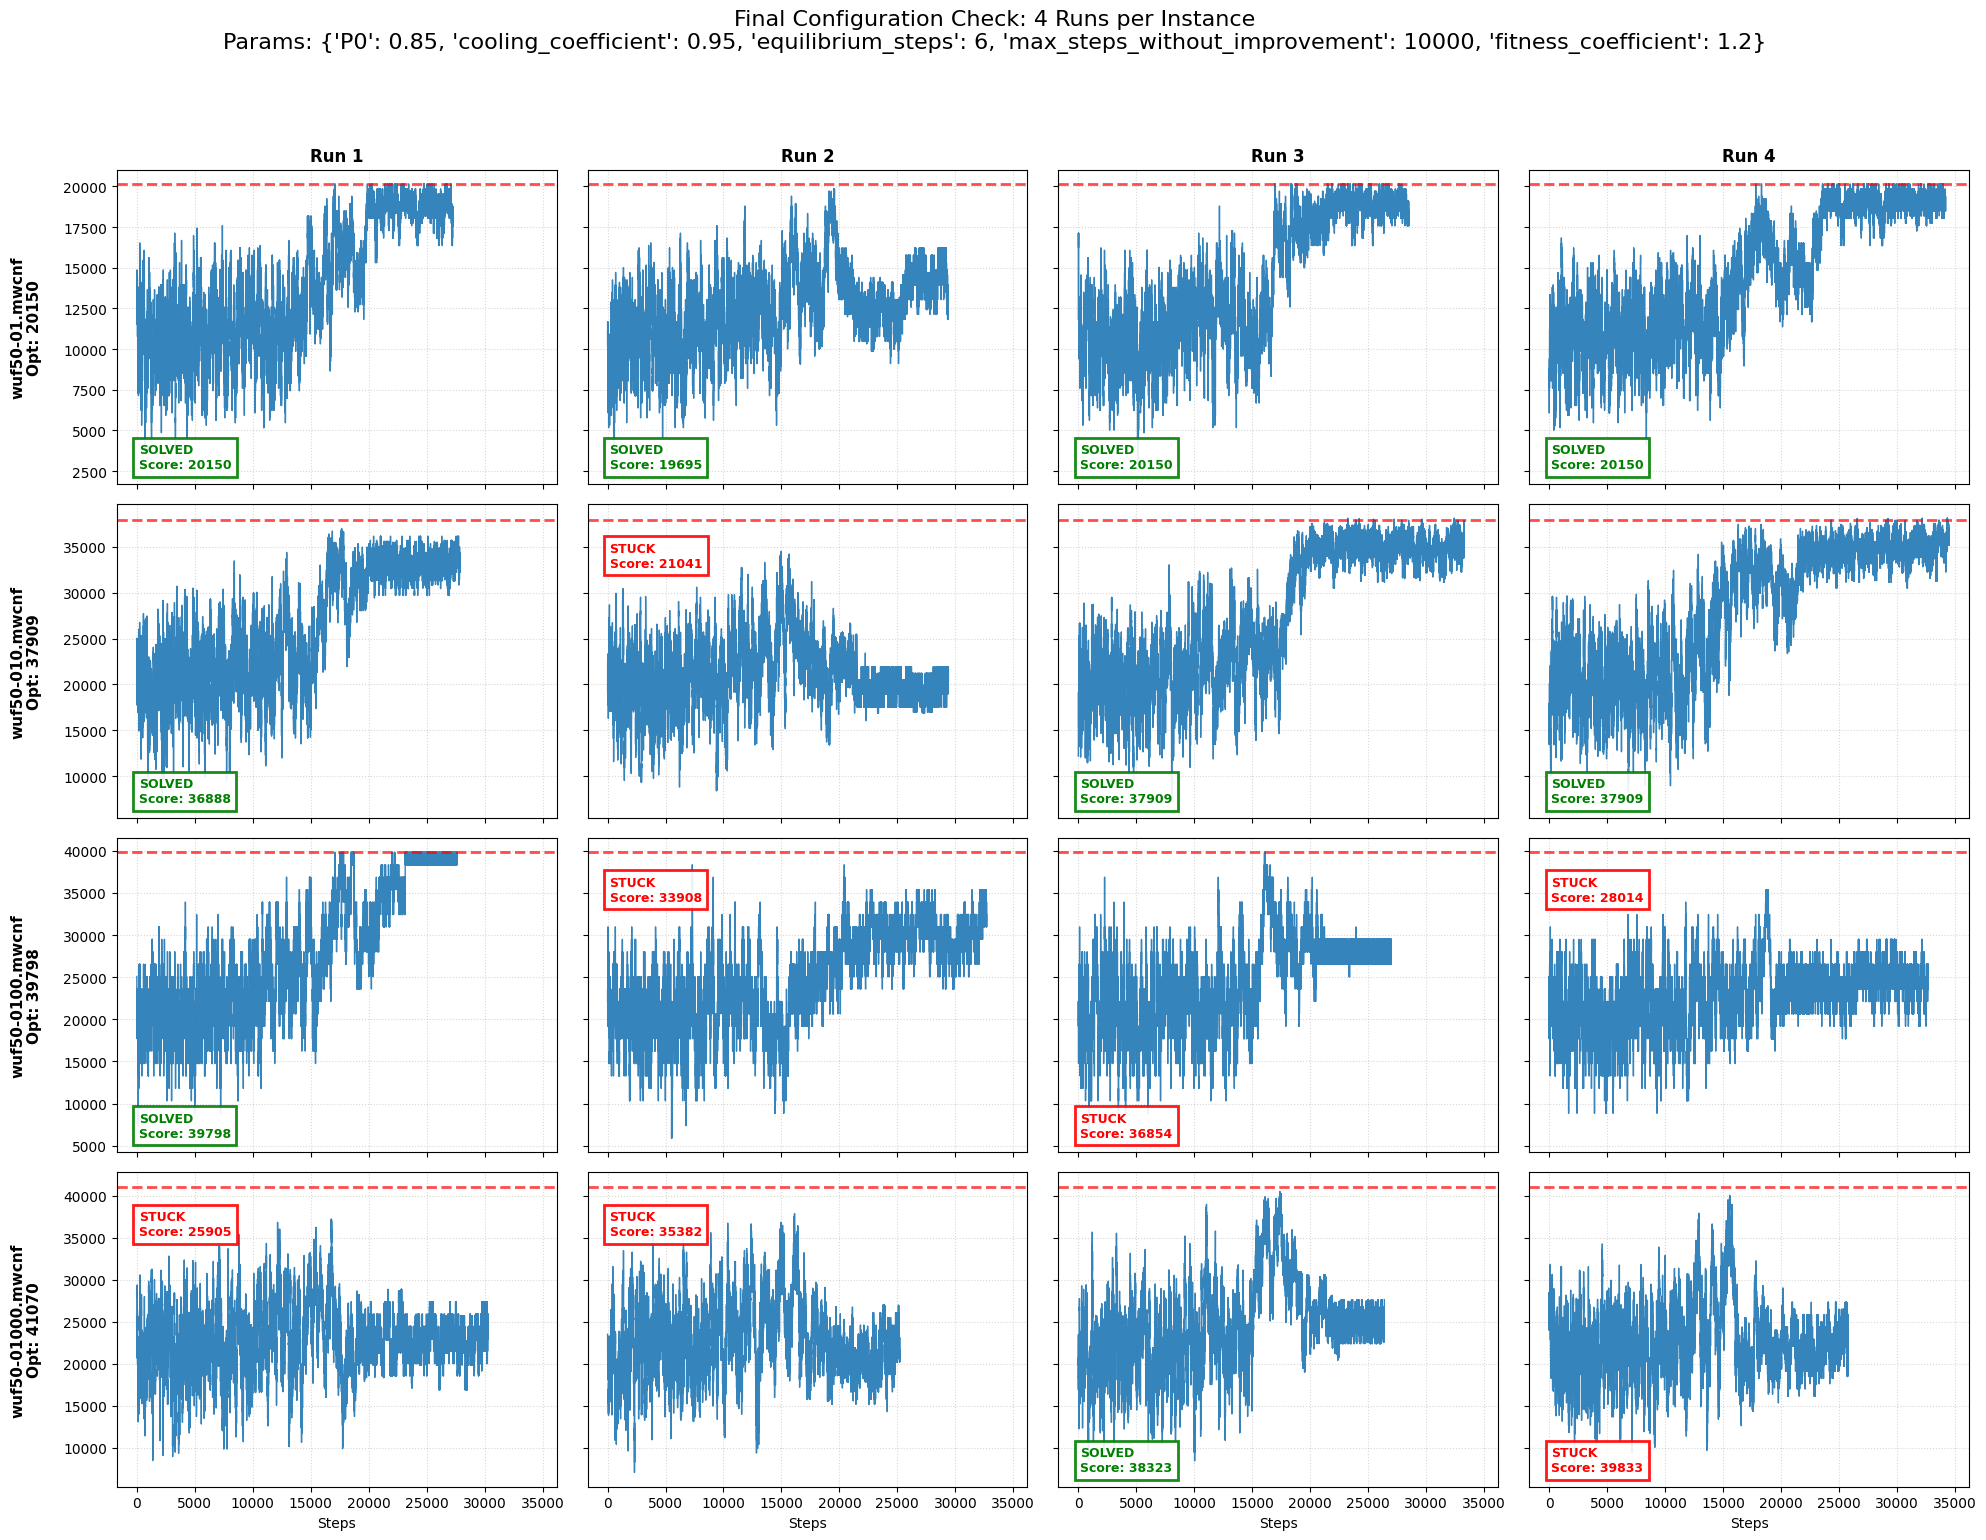


Instance             | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
wuf50-01.mwcnf       | 4    | 4      | 3       | 20036.2    | 99.44 %  | 29850.0  
wuf50-010.mwcnf      | 4    | 3      | 2       | 33436.8    | 88.20 %  | 31275.0  
wuf50-0100.mwcnf     | 4    | 1      | 1       | 34643.5    | 87.05 %  | 30000.0  
wuf50-01000.mwcnf    | 4    | 1      | 0       | 34860.8    | 84.88 %  | 26925.0  


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
baseline_P0 = 0.85
baseline_cooling_coeff = 0.95
baseline_equilibrium_steps = 6 # Using the new coefficient (6 * 50 = 300)
baseline_max_steps_without_improvement = 10000
baseline_fitness_coefficient = 1.2

PARAMS = {
    "P0": baseline_P0,
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": baseline_fitness_coefficient
}

# --- Setup Canvas ---
# 4 Rows (Instances) x 4 Columns (Individual Runs)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16), sharey='row', sharex=True)

# Data storage for the summary table
summary_data = []

print(f"--- Starting Final Verification (16 total runs) ---")
print(f"Params: {PARAMS}")

# Loop through Rows (Instances)
for i, path in enumerate(instance_paths[:4]):
    
    filename = os.path.basename(path)
    key = filename.split(".")[0]
    optimal_weight = solutions_wuf_50_m.get(key, 0)
    
    print(f"Processing Row {i+1}/4: {filename}")
    
    # Initialize aggregators for this instance
    inst_scores = []
    inst_steps = []
    inst_solved_count = 0
    inst_optimal_count = 0

    # Loop through Columns (Runs 1-4)
    for j in range(4):
        ax = axes[i, j]
        
        # 1. Run Algorithm ONCE
        instance = MWSATInstance(path) # Fresh instance
        best_state, history = simulated_annealing(instance, **PARAMS)
        
        # 2. Collect Data
        is_solved = (best_state.clauses_satisfied == instance.num_clauses)
        is_optimal = is_solved and (best_state.current_score >= optimal_weight)
        
        inst_scores.append(best_state.current_score)
        inst_steps.append(len(history))
        if is_solved: inst_solved_count += 1
        if is_optimal: inst_optimal_count += 1

        # 3. Plot History
        ax.plot(history, color='tab:blue', linewidth=1, alpha=0.9)
        
        # Add Optimum Line
        if optimal_weight > 0:
            ax.axhline(y=optimal_weight, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Optimum')

        # 4. Status Text
        status_color = "green" if is_solved else "red"
        status_text = "SOLVED" if is_solved else "STUCK"
        info_text = f"{status_text}\nScore: {best_state.current_score}"
        
        # Smart positioning
        text_y = 0.05 if (best_state.current_score > optimal_weight * 0.9) else 0.8
        
        ax.text(0.05, text_y, info_text, transform=ax.transAxes, 
                bbox=dict(facecolor='white', edgecolor=status_color, linewidth=2, alpha=0.9),
                fontsize=9, fontweight='bold', color=status_color)

        # 5. Styling
        ax.grid(True, linestyle=':', alpha=0.5)
        
        if j == 0:
            ax.set_ylabel(f"{filename}\nOpt: {optimal_weight}", fontsize=11, fontweight='bold', labelpad=15)
        if i == 0:
            ax.set_title(f"Run {j+1}", fontsize=12, fontweight='bold')
        if i == 3:
            ax.set_xlabel("Steps", fontsize=10)

    # Calculate Aggregates for the Summary Table
    avg_score = np.mean(inst_scores)
    avg_steps = np.mean(inst_steps)
    # Calculate % of Optimal
    avg_pct_optimal = (avg_score / optimal_weight * 100) if optimal_weight > 0 else 0.0
    
    summary_data.append({
        "Instance": filename,
        "Runs": 4,
        "Solved": inst_solved_count,
        "Optimal": inst_optimal_count,
        "Avg_Score": avg_score,
        "Avg_Pct_Opt": avg_pct_optimal,
        "Avg_Steps": avg_steps
    })

# Final Layout Adjustments
fig.suptitle(f"Final Configuration Check: 4 Runs per Instance\nParams: {PARAMS}", fontsize=16, y=0.99)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Print Summary Table ---
print("\n" + "="*95)
print(f"{'Instance':<20} | {'Runs':<4} | {'Solved':<6} | {'Optimal':<7} | {'Avg Score':<10} | {'% of Opt':<8} | {'Avg Steps':<9}")
print("-" * 95)
for row in summary_data:
    print(f"{row['Instance']:<20} | {row['Runs']:<4} | {row['Solved']:<6} | {row['Optimal']:<7} | {row['Avg_Score']:<10.1f} | {row['Avg_Pct_Opt']:<6.2f}%  | {row['Avg_Steps']:<9.1f}")
print("="*95)

# 2.2 Nastavení Fitness coefficient
Nastavit funkci která ovlivňuje míru mutace bude nejlepší nastavit jako první

In [10]:
def run_tuning_experiment(base_params, param_name, param_values, instance_path, optimal_weight, n_runs=4):
    """
    Runs a White Box experiment to tune a specific parameter.
    
    Args:
        base_params (dict): Dictionary of fixed parameters (e.g., {'cooling_coefficient': 0.95, ...})
        param_name (str): The name of the parameter to tune (e.g., "P0")
        param_values (list): List of values to test for that parameter
        instance_path (str): Path to the .mwcnf instance file
        optimal_weight (int): The known optimal weight for this instance
        n_runs (int): Number of runs per parameter value (default 4)
    """
    
    # --- Setup Canvas ---
    n_rows = len(param_values)
    n_cols = n_runs
    
    # Dynamic Figure Size: 4 inches height per row
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows), sharey='row', sharex=True)
    
    # If there is only 1 row, axes is a 1D array, make it 2D for consistency
    if n_rows == 1: axes = np.array([axes])
    
    filename = os.path.basename(instance_path)
    summary_data = []
    
    print(f"--- Tuning '{param_name}' on {filename} ({n_rows * n_cols} total runs) ---")
    
    # --- Main Loops ---
    for i, val in enumerate(param_values):
        print(f"Testing {param_name} = {val}...")
        
        # Stats tracking for this parameter value
        val_scores = []
        val_steps = []
        val_solved = 0
        val_optimal = 0
        
        for j in range(n_cols):
            ax = axes[i, j]
            
            # 1. Merge Base Params with Current Tuning Value
            current_params = base_params.copy()
            current_params[param_name] = val
            
            # 2. Run Algorithm
            instance = MWSATInstance(instance_path)
            best_state, history = simulated_annealing(instance, **current_params)
            
            # 3. Collect Data
            is_solved = (best_state.clauses_satisfied == instance.num_clauses)
            is_optimal = is_solved and (best_state.current_score >= optimal_weight)
            
            val_scores.append(best_state.current_score)
            val_steps.append(len(history))
            if is_solved: val_solved += 1
            if is_optimal: val_optimal += 1
            
            # 4. Plot
            ax.plot(history, color='tab:blue', linewidth=1, alpha=0.9)
            if optimal_weight > 0:
                ax.axhline(y=optimal_weight, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Optimum')
            
            # 5. Text & Styling
            status_color = "green" if is_solved else "red"
            status_text = "SOLVED" if is_solved else "STUCK"
            
            ax.text(0.05, 0.05, f"{status_text}\nScore: {best_state.current_score}", 
                    transform=ax.transAxes, 
                    bbox=dict(facecolor='white', edgecolor=status_color, linewidth=2, alpha=0.9),
                    fontsize=9, fontweight='bold', color=status_color)
            
            ax.grid(True, linestyle=':', alpha=0.5)
            
            if j == 0:
                ax.set_ylabel(f"{param_name} = {val}", fontsize=14, fontweight='bold', labelpad=15)
            if i == 0:
                ax.set_title(f"Run {j+1}", fontsize=12, fontweight='bold')
            if i == n_rows - 1:
                ax.set_xlabel("Steps", fontsize=10)

        # Calculate Averages for Table
        avg_score = np.mean(val_scores)
        avg_pct = (avg_score / optimal_weight * 100) if optimal_weight > 0 else 0
        
        summary_data.append({
            "Val": val,
            "Runs": n_cols,
            "Solved": val_solved,
            "Optimal": val_optimal,
            "Avg_Score": avg_score,
            "Avg_Pct": avg_pct,
            "Avg_Steps": np.mean(val_steps)
        })

    # Final Layout
    fig.suptitle(f"Tuning Parameter: {param_name} (Instance: {filename})", fontsize=16, y=0.99)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Print Table ---
    print("\n" + "="*95)
    print(f"{param_name:<15} | {'Runs':<4} | {'Solved':<6} | {'Optimal':<7} | {'Avg Score':<10} | {'% of Opt':<8} | {'Avg Steps':<9}")
    print("-" * 95)
    for row in summary_data:
        print(f"{str(row['Val']):<15} | {row['Runs']:<4} | {row['Solved']:<6} | {row['Optimal']:<7} | {row['Avg_Score']:<10.1f} | {row['Avg_Pct']:<6.2f}%  | {row['Avg_Steps']:<9.1f}")
    print("="*95)

--- Tuning 'fitness_coefficient' on wuf50-0100.mwcnf (25 total runs) ---
Testing fitness_coefficient = 1...
Testing fitness_coefficient = 1.2...
Testing fitness_coefficient = 1.5...
Testing fitness_coefficient = 1.8...
Testing fitness_coefficient = 2.2...


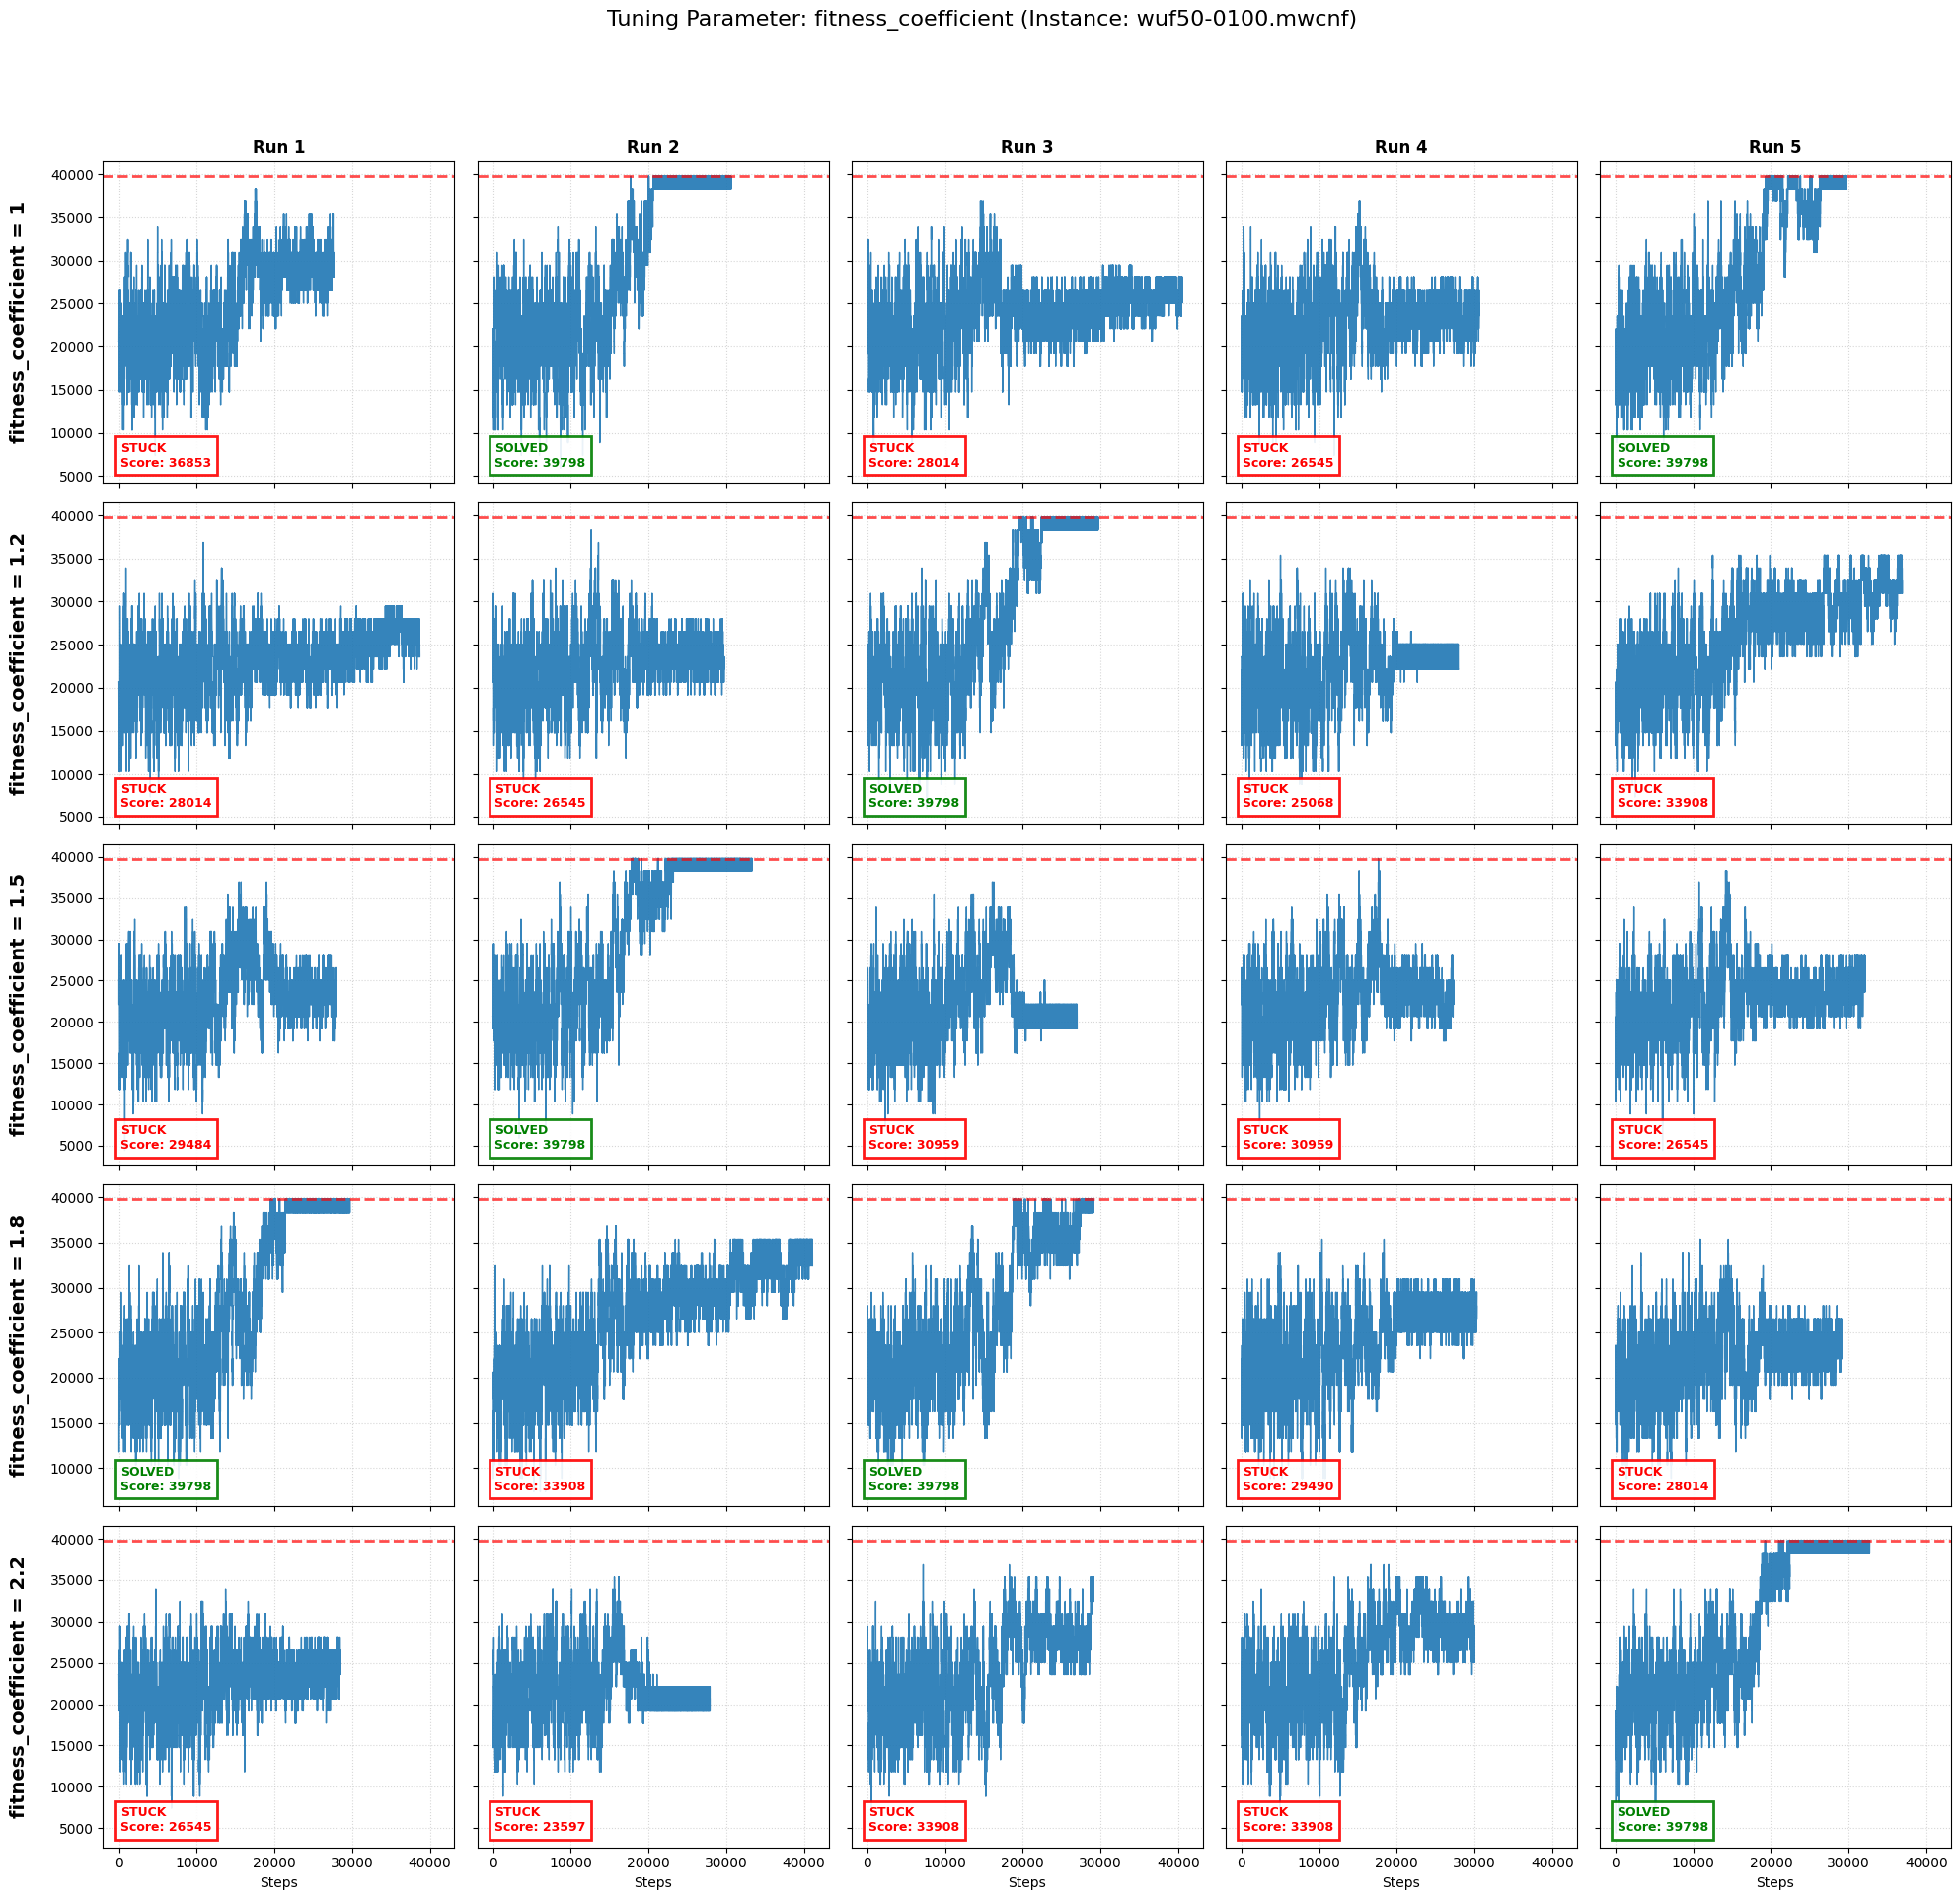


fitness_coefficient | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
1               | 5    | 2      | 2       | 34201.6    | 85.94 %  | 31800.0  
1.2             | 5    | 1      | 1       | 30666.6    | 77.06 %  | 32580.0  
1.5             | 5    | 1      | 1       | 31549.0    | 79.27 %  | 29520.0  
1.8             | 5    | 2      | 2       | 34201.6    | 85.94 %  | 31860.0  
2.2             | 5    | 1      | 1       | 31551.2    | 79.28 %  | 29640.0  


In [29]:
base_params = {
    "cooling_coefficient": baseline_cooling_coeff,
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "P0": baseline_P0
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_m.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="fitness_coefficient",
    param_values=[1,1.2, 1.5, 1.8, 2.2],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [32]:
best_fitness_coeff_param = 1.8

# Nastavení P0
- Jak dlouho budeme explorovat na začátku

--- Tuning 'P0' on wuf50-0100.mwcnf (25 total runs) ---
Testing P0 = 0.6...
Testing P0 = 0.7...
Testing P0 = 0.8...
Testing P0 = 0.85...
Testing P0 = 0.9...


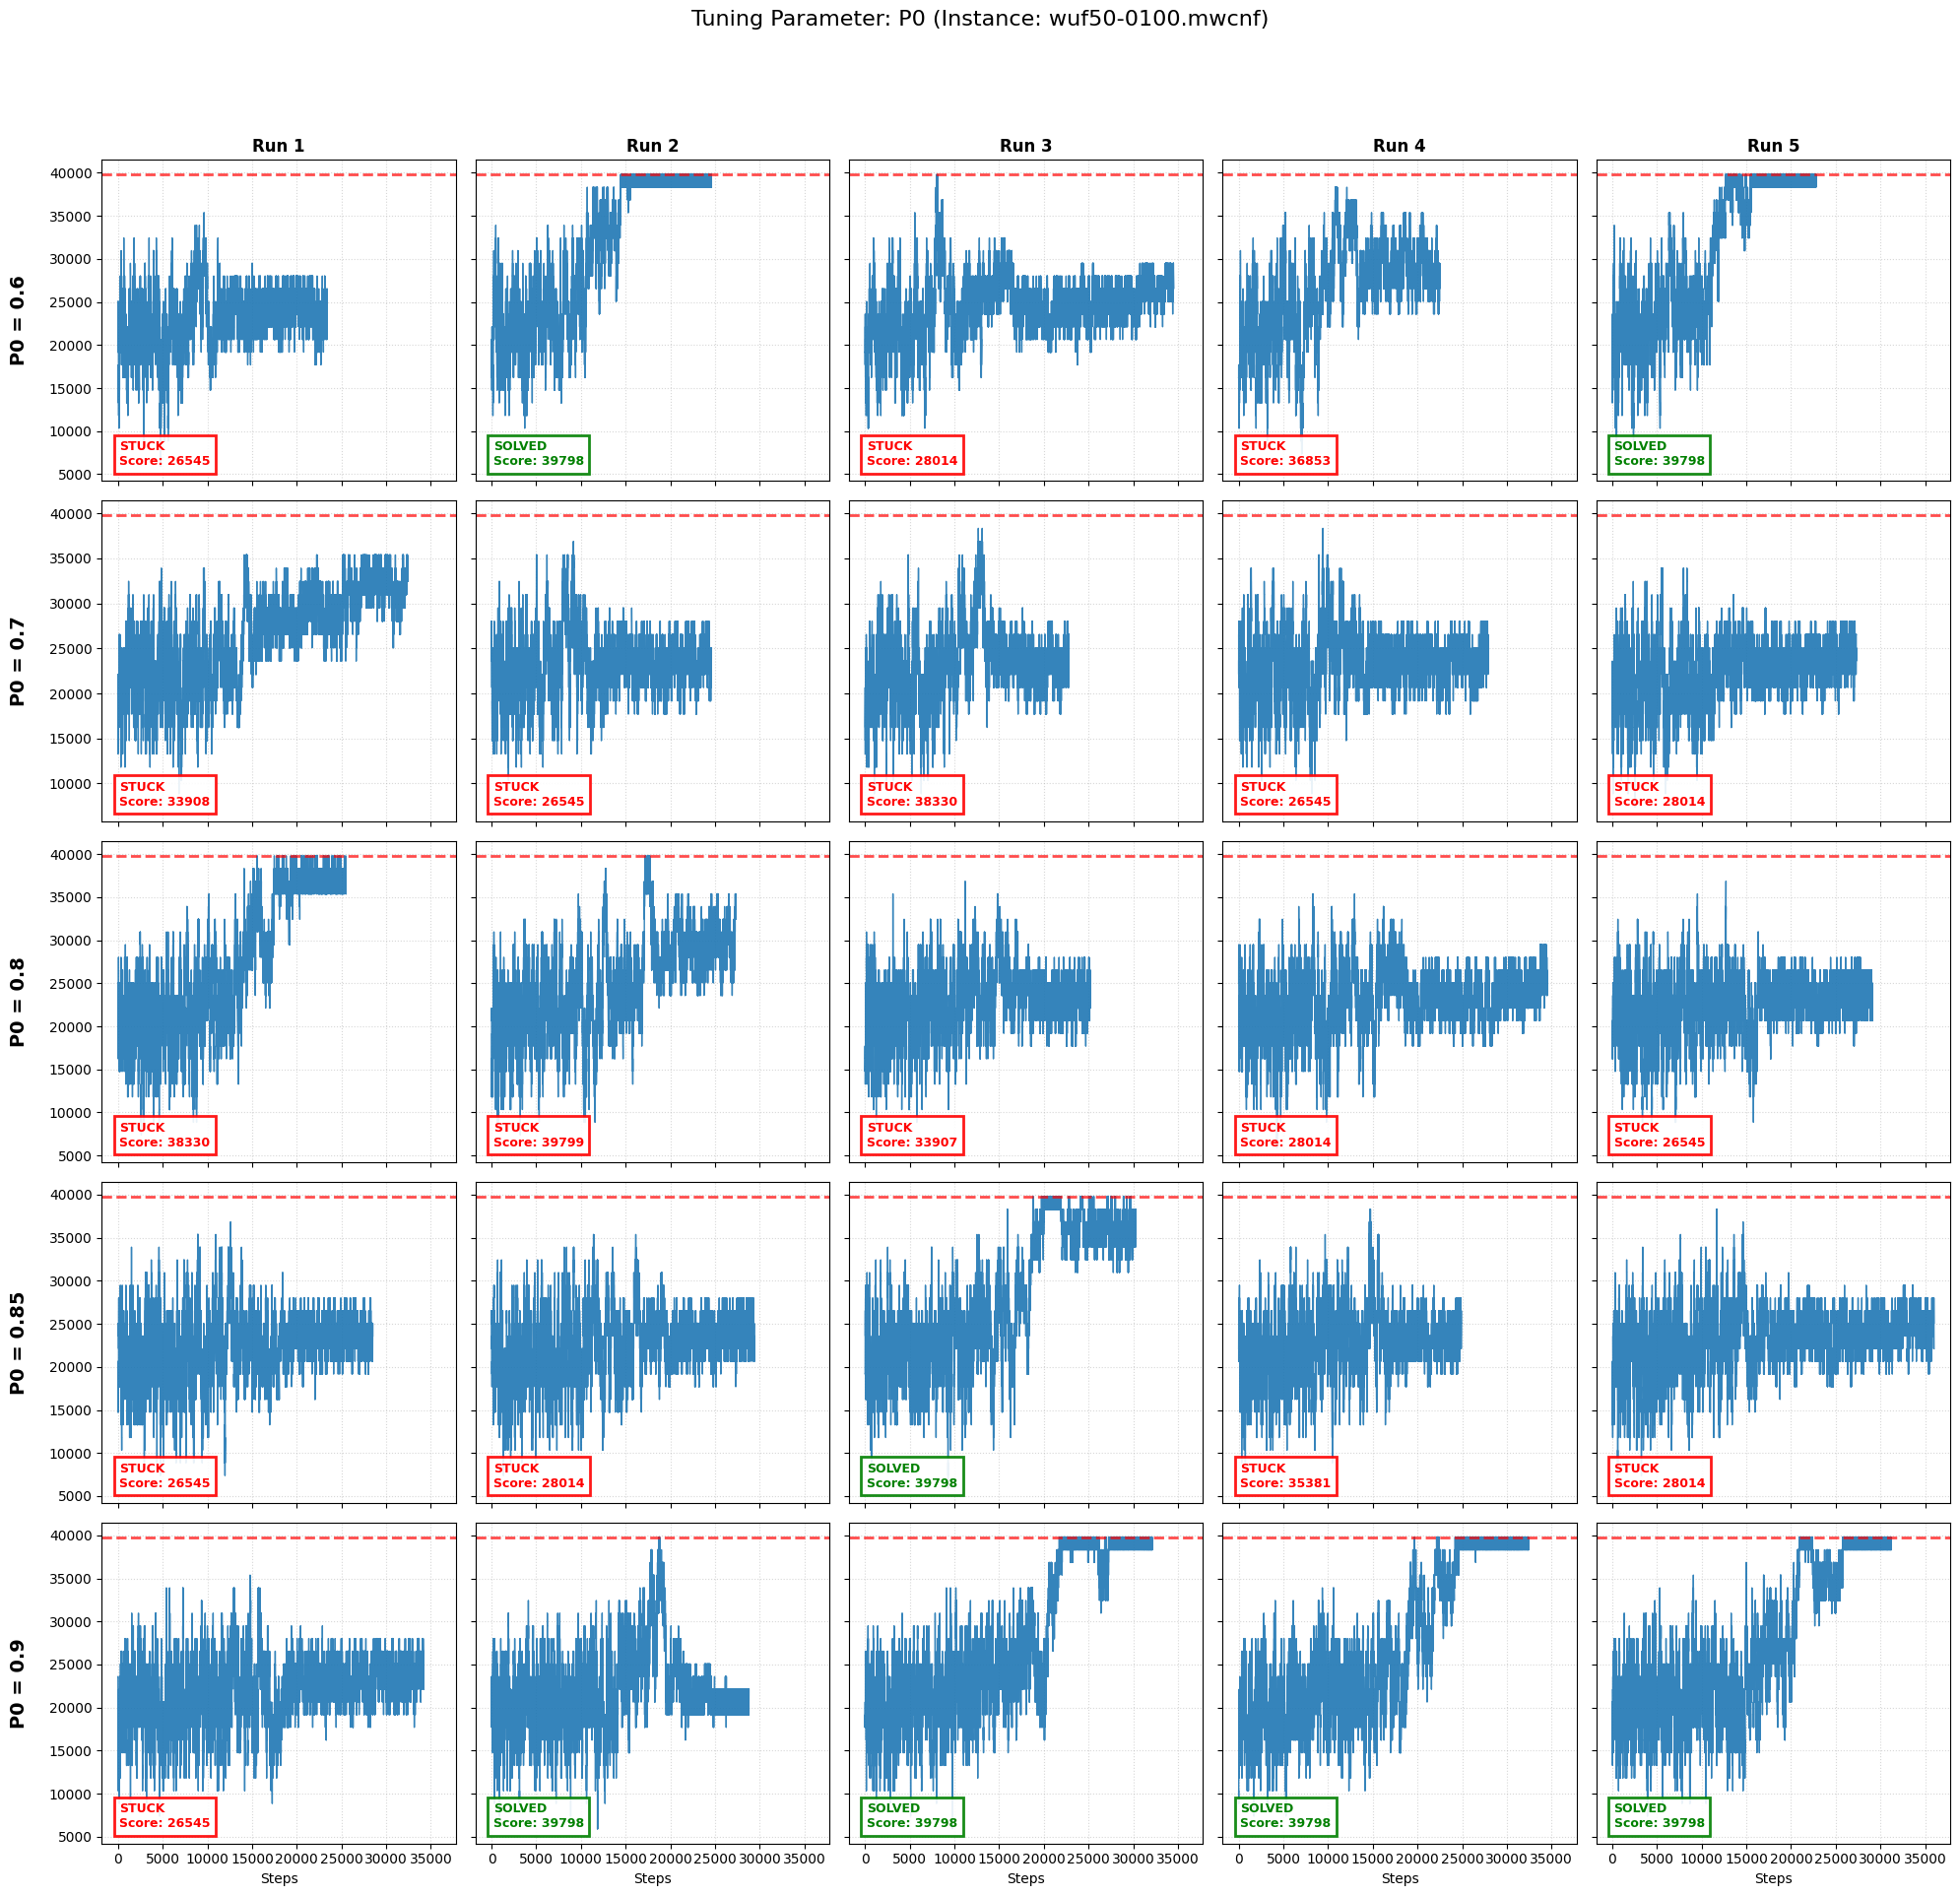


P0              | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
0.6             | 5    | 2      | 2       | 34201.6    | 85.94 %  | 25560.0  
0.7             | 5    | 0      | 0       | 30668.4    | 77.06 %  | 27000.0  
0.8             | 5    | 0      | 0       | 33319.0    | 83.72 %  | 28320.0  
0.85            | 5    | 1      | 1       | 31550.4    | 79.28 %  | 29820.0  
0.9             | 5    | 4      | 4       | 37147.4    | 93.34 %  | 31740.0  


In [33]:
base_params = {
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "cooling_coefficient": baseline_cooling_coeff
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_m.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="P0",
    param_values=[0.6,0.7,0.8,0.85,0.9],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [34]:
best_p0_param = 0.9

# Nastavení `cooling coeefficient`

--- Tuning 'cooling_coefficient' on wuf50-0100.mwcnf (25 total runs) ---
Testing cooling_coefficient = 0.8...
Testing cooling_coefficient = 0.85...
Testing cooling_coefficient = 0.9...
Testing cooling_coefficient = 0.95...
Testing cooling_coefficient = 0.99...


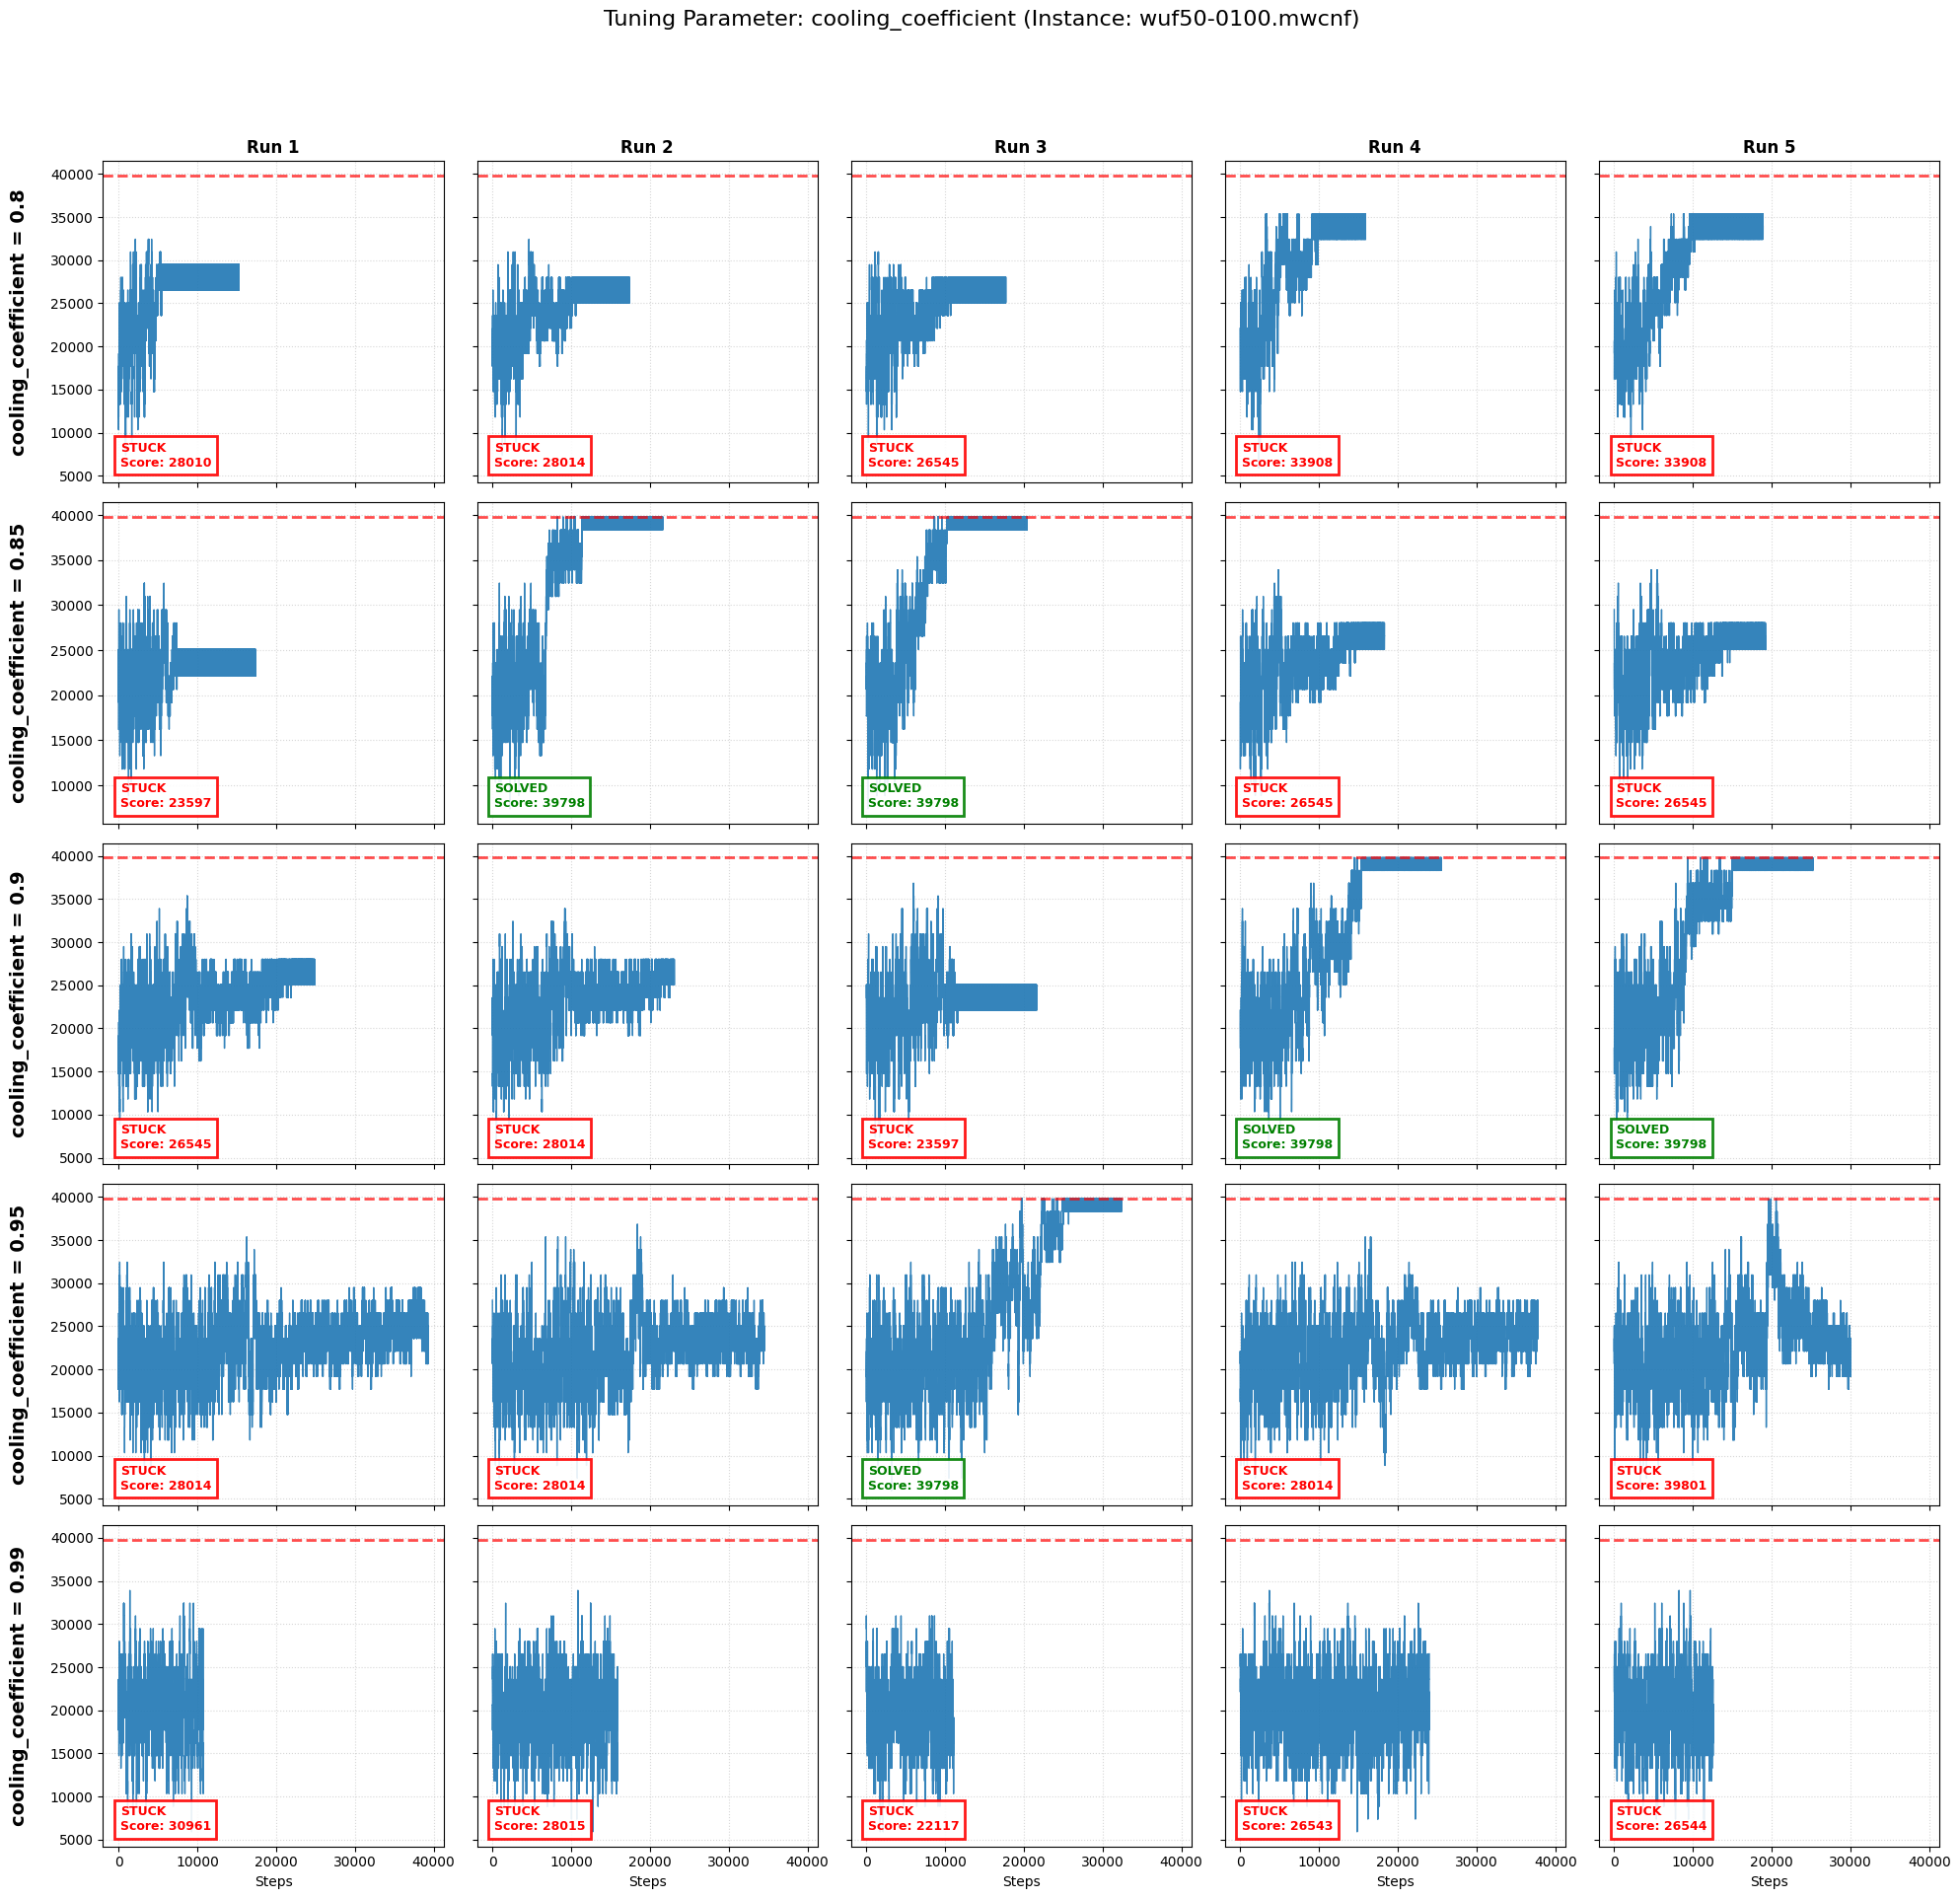


cooling_coefficient | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
0.8             | 5    | 0      | 0       | 30077.0    | 75.57 %  | 17040.0  
0.85            | 5    | 2      | 2       | 31256.6    | 78.54 %  | 19380.0  
0.9             | 5    | 2      | 2       | 31550.4    | 79.28 %  | 24060.0  
0.95            | 5    | 1      | 1       | 32728.2    | 82.24 %  | 34800.0  
0.99            | 5    | 0      | 0       | 26836.0    | 67.43 %  | 14880.0  


In [35]:
base_params = {
    "equilibrium_steps": baseline_equilibrium_steps,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "P0": best_p0_param
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_m.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="cooling_coefficient",
    param_values=[0.8,0.85,0.9,0.95,0.99],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [36]:
best_cooling_coeff = 0.85

# Další parametr: `Equilibrium_steps`
- je to parametr úzce spjatý s rychlostí chlazení, takže bude dávat smysl ho nastavit hned jako následující

--- Tuning 'equilibrium_steps' on wuf50-0100.mwcnf (25 total runs) ---
Testing equilibrium_steps = 2...
Testing equilibrium_steps = 3...
Testing equilibrium_steps = 4...
Testing equilibrium_steps = 6...
Testing equilibrium_steps = 8...


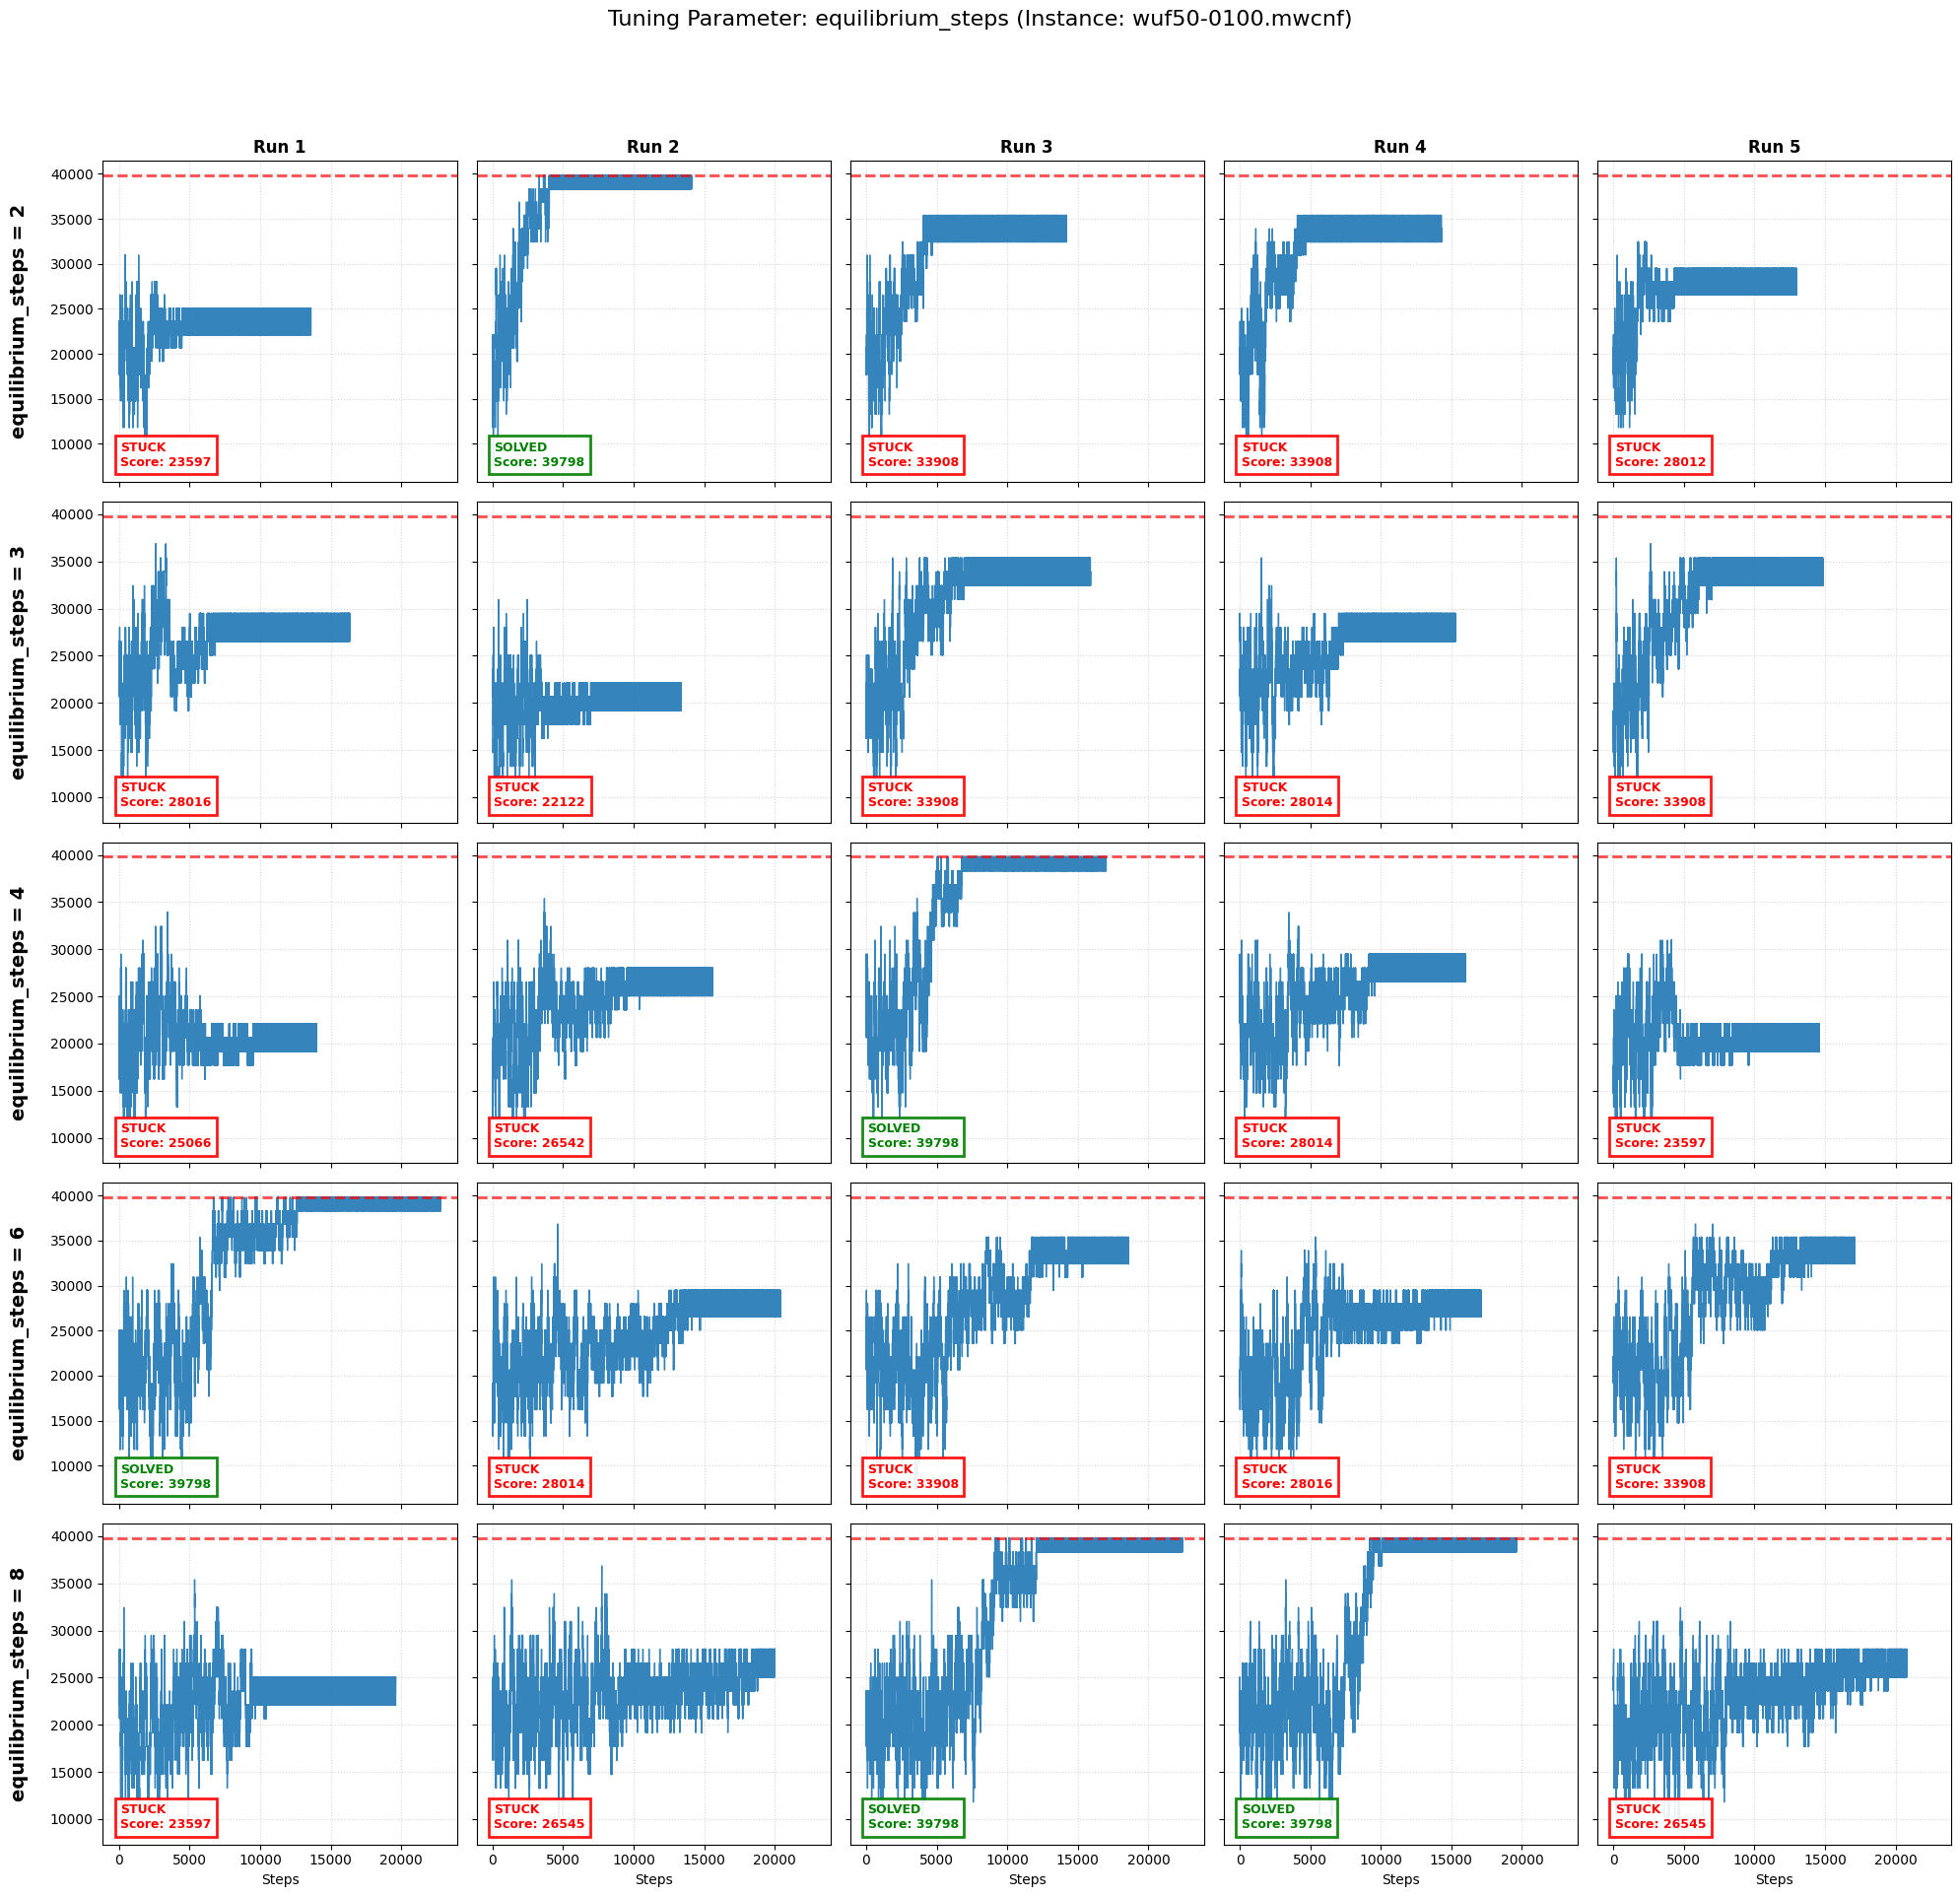


equilibrium_steps | Runs | Solved | Optimal | Avg Score  | % of Opt | Avg Steps
-----------------------------------------------------------------------------------------------
2               | 5    | 1      | 1       | 31844.6    | 80.02 %  | 13840.0  
3               | 5    | 0      | 0       | 29193.6    | 73.35 %  | 15150.0  
4               | 5    | 1      | 1       | 28603.4    | 71.87 %  | 15440.0  
6               | 5    | 1      | 1       | 32728.8    | 82.24 %  | 19200.0  
8               | 5    | 2      | 2       | 31256.6    | 78.54 %  | 20480.0  


In [37]:
base_params = {
    "cooling_coefficient": best_cooling_coeff,
    "max_steps_without_improvement": baseline_max_steps_without_improvement,
    "fitness_coefficient": best_fitness_coeff_param,
    "P0": best_p0_param,    
}

target_path = instance_paths[2]
filename = os.path.basename(target_path)
key = filename.split(".")[0]
opt_weight = solutions_wuf_50_m.get(key, 0)

run_tuning_experiment(
    base_params=base_params,
    param_name="equilibrium_steps",
    param_values=[2,3,4,6,8],
    instance_path=target_path,
    optimal_weight=opt_weight,
    n_runs=5
)

In [ ]:
best_equilibrium_steps = 8